# **Waze Project**

## Feature engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("waze_dataset_no_nans_no_incorrect_data.csv")

In [12]:
# from prev notebook

def get_median(datasource, column_title, round_to_n=1):
    return round(datasource[column_title].median(), round_to_n)

def get_mean(datasource, column_title, round_to_n=1):
    return round(datasource[column_title].mean(), round_to_n)

def print_central_tendency_metrics(datasource, column_title, round_to_n=1):
    median = get_median(datasource, column_title, round_to_n=round_to_n)
    mean = get_mean(datasource, column_title, round_to_n=round_to_n)
    print(f"{column_title}: median = {median}, mean = {mean}")

def boxplotter(datasource, column_title, plot_title=None, **kwargs):
    default_figure_size = (8,2)
    default_flier_size = 3
    plt.figure(figsize=default_figure_size)
    sns.boxplot(x=datasource[column_title], fliersize=default_flier_size)
    if not plot_title:
        plot_title = f'{column_title} box plot'
    plt.title(plot_title)
    
def histplotter(datasource, column_title, plot_title=None, **kwargs):                                                        
    median = get_median(datasource, column_title)
    plt.figure(figsize=(15,5))
    ax = sns.histplot(x=datasource[column_title], **kwargs)            
    plt.axvline(median, color='red', linestyle='--')
    plt.xlabel(column_title)
    plt.ylabel('count')
    if not plot_title:
        plot_title = f'{column_title} histogram'
    plt.title(plot_title)

#### **`km_per_driving_day`**

In [3]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    10925.000000
mean       682.957016
std       1124.076334
min          3.022063
25%        168.775702
50%        319.407852
75%        662.486386
max      14867.817280
Name: km_per_driving_day, dtype: float64

Max value here is 14867 km, which, as we saw in the previous file, is impossible. However, 3Q value seems OK for someone who drives long distances every day

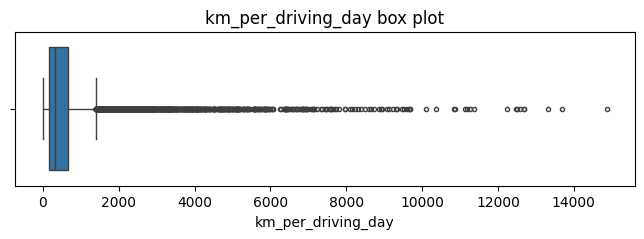

In [13]:
boxplotter(df, 'km_per_driving_day')

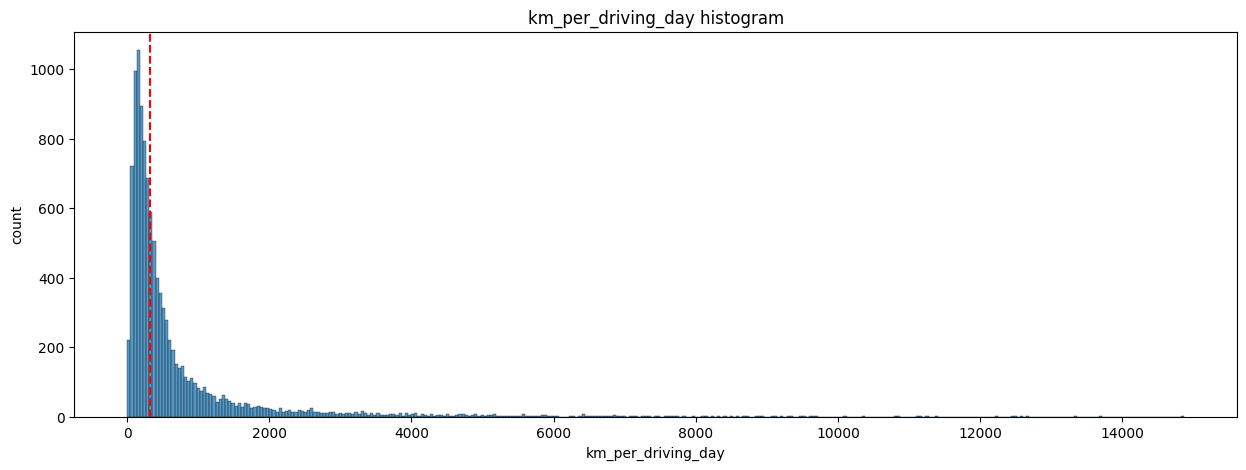

In [27]:
histplotter(df, 'km_per_driving_day')

#### **`drives_per_driving_day`**

At the previous stage, it turned out that some users complete a lot of drives. Let's use it as a feature

In [4]:
df['drives'].describe()

count    10925.000000
mean        80.366407
std         66.730635
min          1.000000
25%         34.000000
50%         61.000000
75%        106.000000
max        596.000000
Name: drives, dtype: float64

In [5]:
df['drives_per_driving_day'] = df['drives'] / df['driving_days']

In [6]:
df.loc[df['drives_per_driving_day']==np.inf, 'drives_per_driving_day'] = 0
df['drives_per_driving_day'].describe()

count    10925.000000
mean        12.125710
std         21.847025
min          1.000000
25%          2.833333
50%          5.533333
75%         11.625000
max        395.000000
Name: drives_per_driving_day, dtype: float64

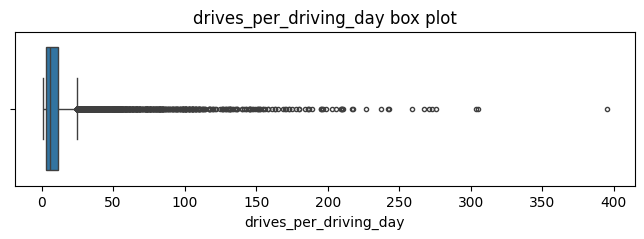

In [14]:
boxplotter(df, 'drives_per_driving_day')

This is an interesting finding. There are entries with A LOT of drives per driving day, with the maximum of 395 (!).
Some users who completed more than 200 drives did that in just one or two driving days (!) and drove several thousand km. This is probably physically impossible.

In [7]:
df[df['drives_per_driving_day'] >= 200]

,Unnamed: 0,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,drives_per_driving_day
48,63,63,retained,253,203,298.673647,1546,0,88,4695.169432,2146.467081,6,1,iPhone,4695.169432,203.0
276,376,376,churned,256,209,387.088693,2707,0,0,3309.863745,660.564362,1,1,iPhone,3309.863745,209.0
344,472,472,churned,250,209,257.054881,1341,139,19,10828.244390,4322.142842,1,1,Android,10828.244390,209.0
1466,1978,1978,retained,262,210,302.915904,1088,20,0,5268.853194,2312.041030,6,1,iPhone,5268.853194,210.0
1798,2445,2445,retained,323,259,375.045901,2793,43,35,4949.591318,747.623435,1,1,Android,4949.591318,259.0
1903,2583,2583,churned,338,271,362.135032,508,128,48,12691.386240,1296.527153,5,1,iPhone,12691.386240,271.0
2250,3057,3057,churned,522,435,659.094737,355,0,120,5562.202041,2167.486429,4,2,iPhone,2781.101020,217.5
2287,3106,3106,retained,272,217,294.646403,1099,319,23,4070.204693,870.903275,5,1,iPhone,4070.204693,217.0
3359,4616,4616,retained,339,273,365.312848,1761,310,18,4065.961787,2501.688159,1,1,iPhone,4065.961787,273.0
3499,4806,4806,retained,337,305,426.923922,1338,0,5,1167.154002,451.280651,6,1,Android,1167.154002,305.0


It would be great if it was possible to get some elaboration on this data from the stakeholders. For now, I suggest we drop rows where `drives_per_driving_day` value is more than 50 (assuming taxis or deliveries can still make dozens of drives per day, but that alone would need some research) and setting the threshold of professional drivers at more than the mean value.

In [8]:
df[df['drives_per_driving_day'] > 50].shape

(469, 16)

In [79]:
# df = df[df['drives_per_driving_day'] <= 50]

In [9]:
drives_per_day_mean = df['drives_per_driving_day'].mean()
drives_per_day_mean

12.12571034371884

#### **`km_per_drive`**

This column shows the mean number of kilometers per drive made in the last month for each user.

In [10]:
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df.loc[df['km_per_drive']==np.inf, 'km_per_drive'] = 0
df['km_per_drive'].describe()

count    10925.000000
mean       101.341372
std        175.592875
min          1.008775
25%         27.902017
50%         56.391229
75%        114.172609
max       5862.481732
Name: km_per_drive, dtype: float64

Max value is 5862 km per drive! Driving even at extreme 150 km/h, it would take 39 hours to complete this drive. It's unlikely that this could be real

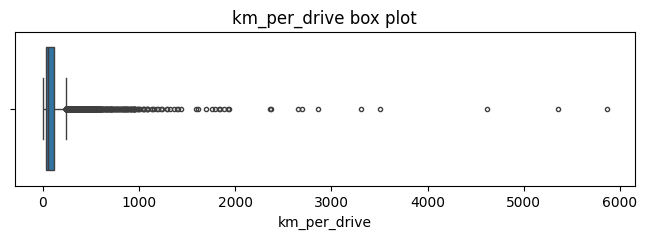

In [15]:
boxplotter(df, 'km_per_drive')

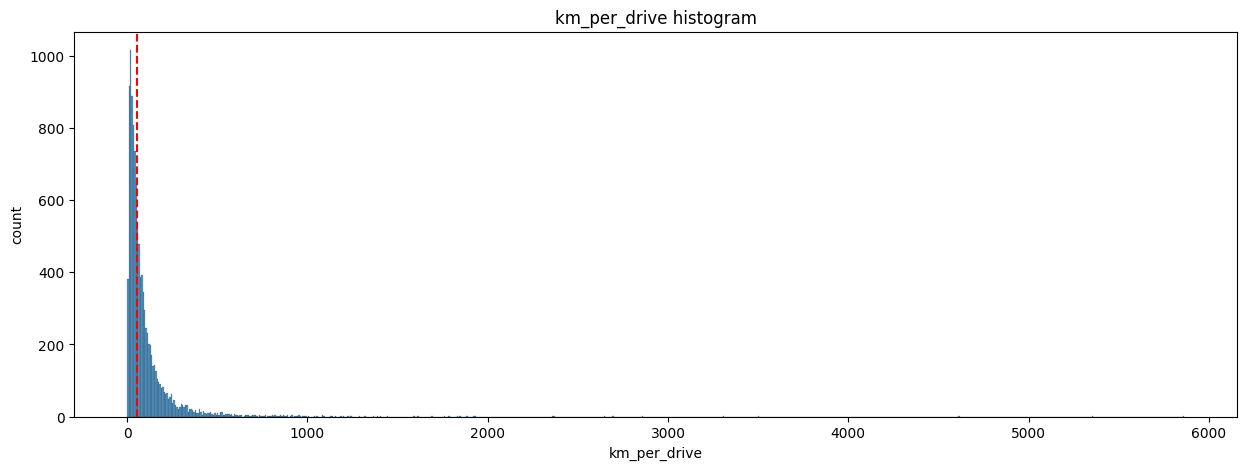

In [16]:
histplotter(df, 'km_per_drive')

In [11]:
df[df['km_per_drive'] >= 1200].shape

(30, 17)

There are users who make drives that are hundreds and even thousands km long. There may be a group of long-haul drivers indicated here.
If it is true, the specifics of their usage need to be studied, but, for the sake of dealing with extremities, we can cut the rows by threshold of km_per_drive >= 1200.

In [83]:
#df = df[df['km_per_drive'] <= 1000]

In [84]:
df.shape

(10925, 17)

#### **`session_per_activity_day`**

This column shows the mean number of sessions per activity day logged in the last month for each user.

In [18]:
df['session_per_activity_day'] = df['sessions'] / df['activity_days']
df.loc[df['session_per_activity_day']==np.inf, 'session_per_activity_day'] = 0
df['session_per_activity_day'].describe()

count    10925.000000
mean        10.423642
std         19.520012
min          1.000000
25%          2.592593
50%          5.000000
75%         10.263158
max        339.000000
Name: session_per_activity_day, dtype: float64

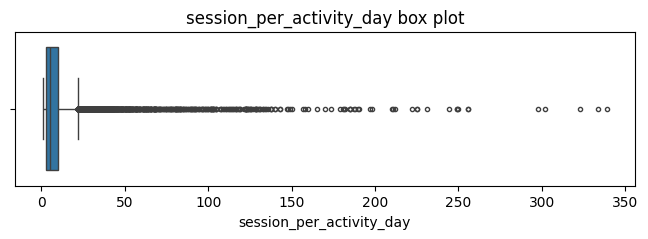

In [19]:
boxplotter(df, 'session_per_activity_day')

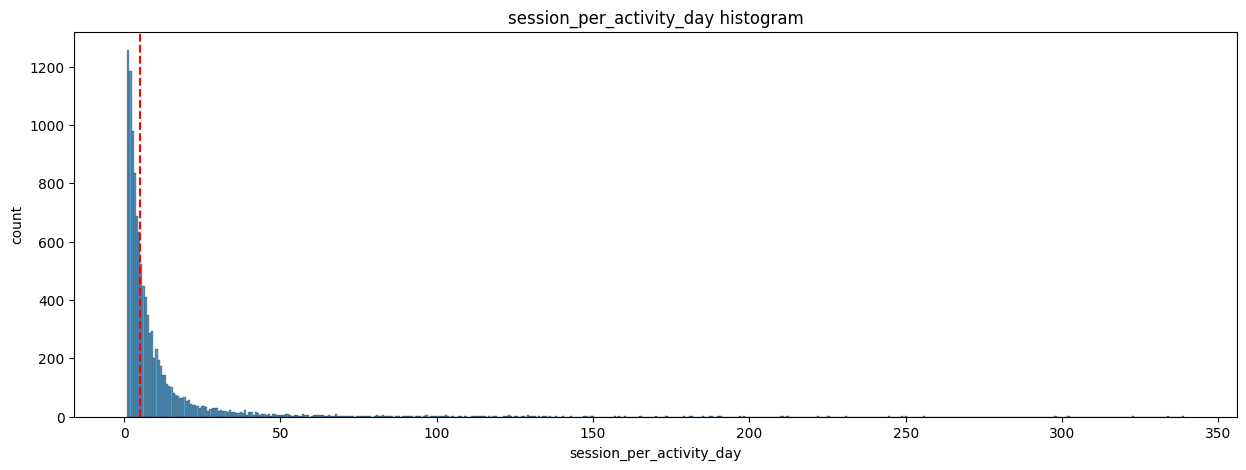

In [20]:
histplotter(df, 'session_per_activity_day')

Once again, this value is heavily skewed to the right and its max values are very questionnable

fitted scale is 9.423642071629455


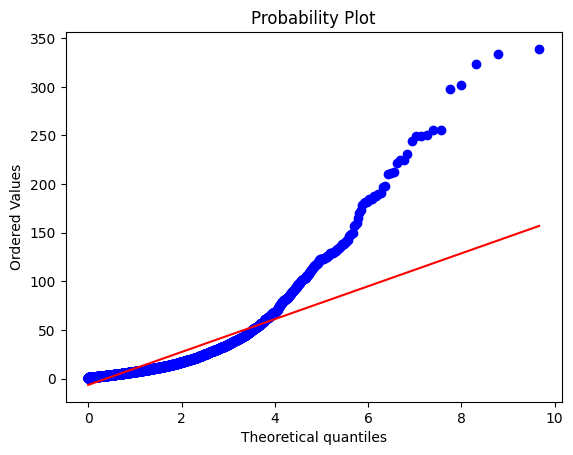

In [21]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
sessions = df.session_per_activity_day.to_numpy()
loc, scale = stats.expon.fit(sessions)
print(f'fitted scale is {scale}')
stats.probplot(sessions, dist=stats.expon, fit =True,plot=ax)
plt.show()

In [22]:
df['sessions'].describe()

count    10925.000000
mean        96.517620
std         81.869724
min          1.000000
25%         39.000000
50%         72.000000
75%        128.000000
max        743.000000
Name: sessions, dtype: float64

## Variable encoding

#### **Target encoding**

In [85]:
df['is_churned'] = np.where(df['label'] == 'churned', 1, 0)

In [86]:
df.drop(columns = ['label'], inplace=True)

#### **Dummying features**

The only categorical feature remaining is the device, we can get dummies for it.

In [87]:
df["device_code"] = np.where(df["device"] == "iPhone", 1, 2)

In [88]:
df.drop(columns = ["device"], inplace=True)

In [89]:
df.head()

,Unnamed: 0,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,drives_per_driving_day,km_per_drive,is_churned,device_code
0,0,0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,138.360267,11.894737,11.632058,0,2
1,1,1,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1246.901868,9.727273,128.186173,0,1
2,2,2,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,382.393602,11.875000,32.201567,0,2
3,3,3,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,304.530374,13.333333,22.839778,0,1
4,4,4,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,219.455667,3.777778,58.091206,0,2


In [90]:
df.to_csv('dataset_encoded_features.csv')

## Conclusion

While trying to engineer helpful features, I discovered values that raised reasonable suspicion:
- extremely long averaged distances per drive
- extremely high averaged values of the number of drives per driving day

While, in my opinion, this might indicate two different groups of drivers: 1) long-haul drivers or travellers and 2) taxi/delivery drivers making lots of drives daily. Their patterns of usage need further research, and insights from stakeholders will be very important. However, some of such values do not seem physically possible. So it is crucial to discuss possible errors in the data and also learn how to establish proper thresholds.